

# Project: Investigate a Dataset - [No-Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is tagged 'No-Show Appointments' and it is from kaggle. It houses information from approximately 100k medical appointments in brazil about whether or not patients show up on their appointments. 

<u/>The dataset has <b/>14 columns</b> with descriptions below:  </u>

<p/><b/>PatientID</b> - This is the Patient's unique ID </p>
<p/><b/>AppointmentID</b> - This is the Patient's Appointment ID or tag</p>
<p/><b/>Gender</b> - This identifies whether the patient is a male or female </p>
<p/><b/>ScheduledDay </b>- This marks the date the appointment was scheduled</p>
<p/><b/>AppointmentDay </b>- This is the projected date of appointment</p>
<p/><b/>Age</b> - The patient's age</p>
<p/><b/>Neighbourhood </b>- This identifies the hospital location</p>
<p/><b/>Scholarship</b> - Identifies whether or not the patient is enrolled in Brasillian welfare program</p>
<p/><b/>Hipertension</b> - Identifies whether or not the patient suffers from hipertension</p>
<p/><b/>Diabetes </b>- Identifies whether or not the patient suffers from Diabetes</p>
<p/><b/>Alcoholism</b> - Identifies whether or not the patient is an alcoholic</p>
<p/><b/>Handcap</b> - Identifes whether or not the patient is handicapped</p>
<p/><b/>SMS_received</b> - Marks whether or not the patient recieved one or more sms</p>
<p/><b/>No-show</b> - Marks whether or not the patient showed up for their appoinment</p>



### Question(s) for Analysis

Hypothetically, the dataset has a survey of patients with some variables and whether they show up or not on their appointment days. This analysis would focus on trying to substantiate why patient would most likely show up or not on their appointment days and some of the contributing factors. This is intended to be run by exploring some of the questions below

##### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> <p/><b/>Does the difference between ScheduledDay and AppointmentDay significantly impact the Show-up possibility?</b></p>
>>> It is important to investigate this to as to observe if there is a pattern around the span between the ScheduledDay and AppointmentDay and match that with show or no-show. If a pattern is spotted, it could be used to decide on some indicators as to whether or not appointmentDays are approved
> <p/><b/>What Age groups are more likely to show up for their appointment?</b></p>
>>> There might be indicators around this as to which age brackets honour appointments mostly. This could also drive some conversations around why the other age brackets mostly fail to show-up and what more service could be done for them (probably they are scheduled for home appointments if they happen to be mostly elderly)
> <p/><b/>Does sms received impact show rate?</b></p>
>>> There is need to investigate what incentive or media is working in communicating with the patient. Exploring this question would infer whether sending sms is significant and reliable to be used as a medium of communication or not.
> <p/><b/>Is there a relationship between the weekday of appointment and possibility of show-up?</b></p>
>>> A shallow look into this may reveal whether there is a specific day wherein influx of patients are experienced and would then lead to investigating what the cause could be and vice versa
> <p/><b/>What is the relationship between number of waiting days and possibility of show-up?</b></p>
>>> It would be good to know if this has specific impact on show or no-show




In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
% matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



In [55]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head(5)
df.shape

(110527, 14)

The dataset has 110,527 rows and 14 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no empty or null values in the dataset.
It seems not all data types are correct (e.g SchdeduleDay and AppointmentDay), those would be taken care of a bit later

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The revelation from here is that minimum 'Age' is -1, not so practicable. That would be dealt with later. Also, most of the variables are categorical (with values 0s and 1s). 

The mean Age of Patients in the dataset is around 37years, with maximum age being 115years

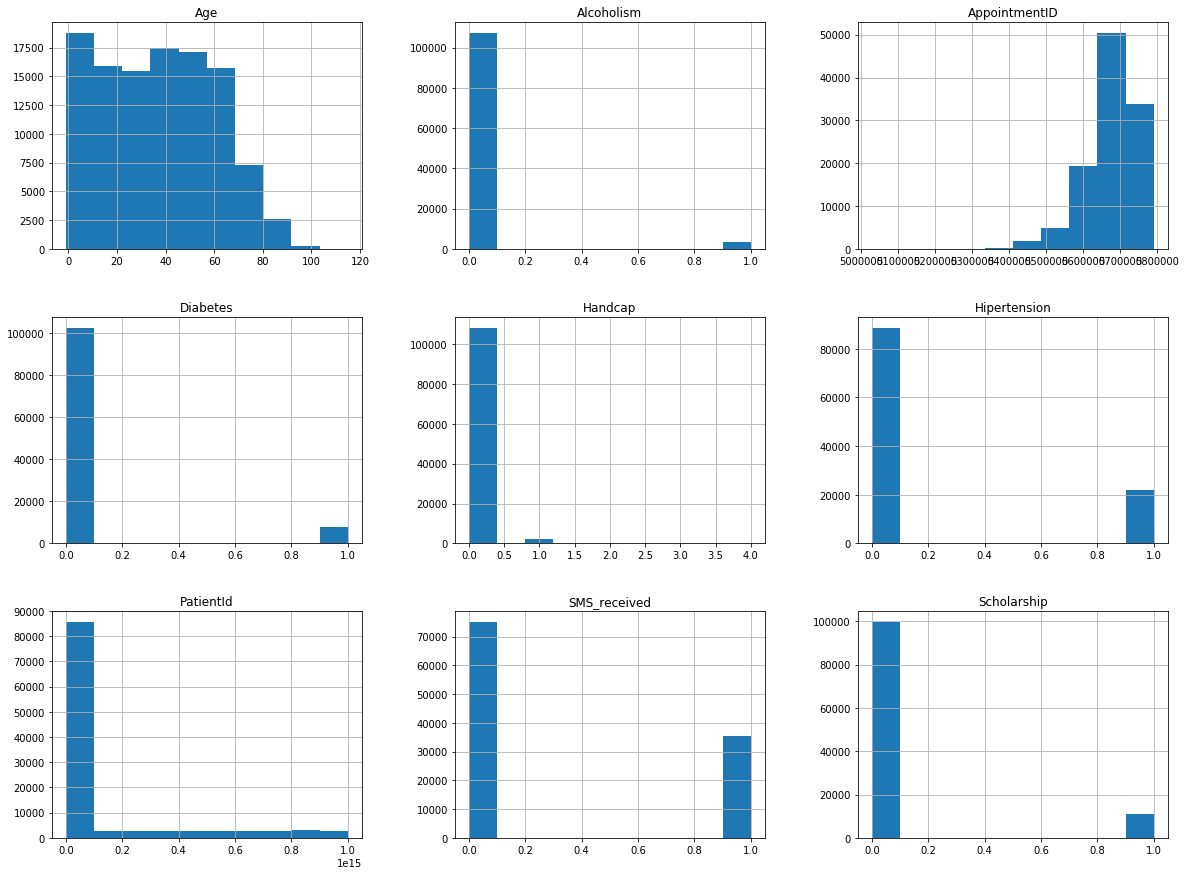

In [6]:
df.hist(figsize = (20,15));

Age seems to be almost normally distributed as most of the patient have ages fall around the median age. This is slightly rightly skewed

Most of the patients sampled are not diabetic, nor hypertensive etc

It can be seen from the histogram that about half of the patients did receive sms sent to them, and just about 1/5th are on Brassilian welfare program (scholarship)

In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

ScheduledDay and AppointmentDay have wrong data types (string) and should be converted to datetime format

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


PatientID and AppointmentID seem not too useful to the analysis, these are individual specific and cannot in anyway be used infer any occurence within the data

Let's investigate the Age distribution

In [9]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Exploring the age revealed that there is a patient with age of -1, highly unlikely, but lets ascertain this claim

In [56]:
df[df['Age'] == -1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Evidently, this might have been erroneously entered, so it will be dropped

In [57]:
df.drop(99832, axis = 0, inplace = True)


In [58]:
df.reset_index(drop = True, inplace = True)
df.shape


(110526, 14)

The patient record with Age -1 has been dropped thereby reducing the records by 1

In [59]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


Converted ScheduledDay and AppointmentDay data types to datetime.

Lets verify below

In [14]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [60]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

'PatientID' and 'AppointmentID' columns are presumably invaluable to the analysis, hence their drop. The number of columns should be 2 less than 14 now

In [61]:
df.shape

(110526, 12)

In [17]:
sorted(df['Age'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115]

In [62]:
Age_bins = [0,1,7,12,18,30,60,90,115]
Age_Cat = ['infant', 'toddler', 'youngster', 'teenager', 'young_adult', 'adult','senior_citizen', 'aged']
df['age_category'] = pd.cut(df['Age'], Age_bins, labels = Age_Cat)

Defined categories for Ages to be used down the analysis. This is to enable a more reasonable grouping of the ages into categories

In [63]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,senior_citizen
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult


In [20]:
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
age_category                 category
dtype: object

A final check on the data types. 

In [64]:
df['ScheduledDay'] = df.ScheduledDay.dt.date
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,senior_citizen
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,senior_citizen
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,youngster
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adult


The time portion of the ScheduledDay is inconsequential, therefore, it was stripped off

In [65]:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)

After the time portion of the timestamp (for ScheduledDay) was stripped, it returned the values with string data types, hence the necessity to convert it back to datetime data types

In [23]:
df.dtypes

Gender                         object
ScheduledDay           datetime64[ns]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
age_category                 category
dtype: object

In [66]:
df['waiting_days'] = df['AppointmentDay'].sub(df['ScheduledDay'], fill_value = 0, axis = 0)


I added a 'waiting days' column to calculate how long patients stayed between the ScheduledDay and AppointmentDay and converted the data type to int

In [90]:
df['waiting_days']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
5         2 days
6         2 days
7         2 days
8         0 days
9         2 days
10        2 days
11        3 days
12        1 days
13        1 days
14        1 days
15        3 days
16        1 days
17        1 days
18        3 days
19        0 days
20        2 days
21        2 days
22        4 days
23        1 days
24        0 days
25        3 days
26        0 days
27        2 days
28        0 days
29        0 days
           ...  
110496    0 days
110497    0 days
110498    0 days
110499    0 days
110500    0 days
110501    0 days
110502    0 days
110503    0 days
110504    0 days
110505    0 days
110506    0 days
110507    0 days
110508    0 days
110509    0 days
110510    0 days
110511    0 days
110512    0 days
110513    0 days
110514    2 days
110515    1 days
110516    0 days
110517   41 days
110518   41 days
110519   35 days
110520   35 days
110521   35 days
110522   35 days
110523   41 da

In [26]:
df.dtypes

Gender                         object
ScheduledDay           datetime64[ns]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
age_category                 category
waiting_days          timedelta64[ns]
dtype: object

In [67]:
df['day_of_week'] = df.AppointmentDay.dt.weekday_name

Also, added a column to extract the weekday name (Monday, Tuesday, etc) from the AppointmentDay

In [68]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category,waiting_days,day_of_week
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,senior_citizen,0 days,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult,0 days,Friday


In [69]:
df['No-show'].replace(['No','Yes'], [1,0], inplace = True)

Encoded the 'No-show' values with 1 and 0 for ease of analysis. 

'No' means the patient showed up, and given a 1
</p>'Yes' means the patient did not show up , and given 0<p/>

In [70]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category,waiting_days,day_of_week
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,senior_citizen,0 days,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,adult,0 days,Friday


<a id='eda'></a>
## Exploratory Data Analysis




### Does the difference between ScheduledDay and AppointmentDay significantly impact the Show-up possibility?

In [71]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


# Count of patients that showed up for their appointments

ShowedUp = df['No-show'] == 1 #If patients showed up for their appointment
NotShowedUp = df['No-show'] == 0  #If patients did not show up for their appointment


2 buckets were created; one for those that showed up during their appointment, and the other for those that didnt show up for their appointment

In [72]:
df['actual_days'] = df['waiting_days']
df['actual_days'] = df['waiting_days'].astype(str)
df['actual_days'] = df['actual_days'].str.extract('([0-9]+)')
df['actual_days'] = df['actual_days'].astype(int)

The above line is to extract the figures from the 'waiting_days' column. The output returned was in the format (0 days). The code was used to extract '0' from the '0 days'

The 'waiting_days' column houses the difference in days between the AppointmentDay and ScheduledDay

In [18]:
df[ShowedUp].groupby('waiting_days')['age_category'].count()

waiting_days
0 days      35413
1 days       3953
2 days       5052
3 days       2016
4 days       4003
5 days       2350
6 days       2975
7 days       3514
8 days       1598
9 days       1134
10 days       928
11 days       648
12 days       742
13 days      1107
14 days      1933
15 days       956
16 days       768
17 days       733
18 days       698
19 days       655
20 days       760
21 days      1239
22 days       743
23 days       523
24 days       375
25 days       374
26 days       454
27 days       674
28 days      1135
29 days       698
            ...  
94 days         2
95 days         4
96 days         3
97 days         2
98 days         4
101 days        1
102 days        3
103 days        1
104 days        2
105 days        4
107 days        2
108 days        5
109 days        5
110 days        1
111 days        2
112 days        5
115 days        2
117 days        1
119 days        4
122 days        3
123 days        1
125 days        1
127 days        1
133 days       

In [35]:
df.dtypes

Gender                         object
ScheduledDay           datetime64[ns]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                         int64
age_category                 category
waiting_days          timedelta64[ns]
day_of_week                    object
actual_days                     int64
dtype: object

In [73]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category,waiting_days,day_of_week,actual_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,senior_citizen,0 days,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,adult,0 days,Friday,0


In [74]:
days_bin = [-1,10,30,60,120,180 ]
days_cat = ['very_early', 'early','delayed','late','very_late']
df['waiting_category'] = pd.cut(df['actual_days'], days_bin, labels = days_cat)

In [75]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_category,waiting_days,day_of_week,actual_days,waiting_category
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,senior_citizen,0 days,Friday,0,very_early
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,adult,0 days,Friday,0,very_early


A bin was created to categorize 'waiting_days' == 'actual_days' into categories for ease of analysis

In [76]:
#Creating functions that would label my charts

def xlabel(xaxis_label):
    plt.xlabel(xaxis_label)
    return xlabel

def ylabel(yaxis_label):
    plt.ylabel(yaxis_label)
    return ylabel

def title(chart_title):
    plt.title(chart_title)
    return title

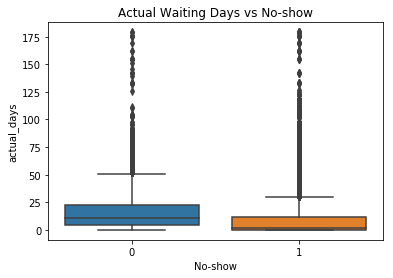

In [78]:
sns.boxplot(x = 'No-show', y = 'actual_days', data = df);
title("Actual Waiting Days vs No-show");

From the box plot above, it is evident that most of the patient that showed up had the actual waiting days to be less than approximately 15days. This implies that there is a higher tendency of keeping up with the appointment if the number of days between the ScheduledDay and AppointmentDay was much lower. 

It could be recommended to encourage patients to have a shorter waiting days or make it impossible to select really far dates for appointment while scheduling

waiting_category
very_early    64961
early         16293
delayed        5454
late           1443
very_late        56
Name: No-show, dtype: int64

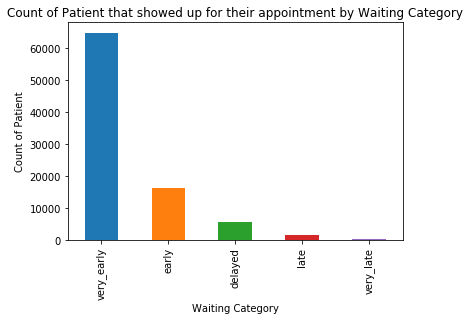

In [79]:
df[ShowedUp].groupby('waiting_category')['No-show'].count().plot(kind = 'bar');
xlabel('Waiting Category')
ylabel('Count of Patient')
title("Count of Patient that showed up for their appointment by Waiting Category");
df[ShowedUp].groupby('waiting_category')['No-show'].count()

Apparently, with the bar chart above, we could further allude to the revelation above that most patients with short waiting-days honour and show up on their appointments than other. The bar chart shows that more than 50% of those who showed up for their appointment were those who had a short wiaitng period (less than or equal to 10days)

### What Age groups are more likely to show up for their appointment

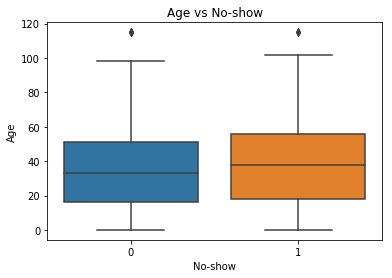

In [80]:
sns.boxplot(x = 'No-show', y = 'Age', data = df);
title("Age vs No-show");

Majority of the patients that showed up on their appointments were between ages 20 and 60years. This is the predominantly the young adult and adult categories. 

Speculatively, teenagers and kids might need their guardians to monitor their appointmentDays, same as the elderly. This might be a contributive factor to they not appearing on their appointment days

age_category
infant             1858
toddler            7119
youngster          4852
teenager           5790
young_adult       12622
adult             36310
senior_citizen    16510
aged                246
Name: No-show, dtype: int64

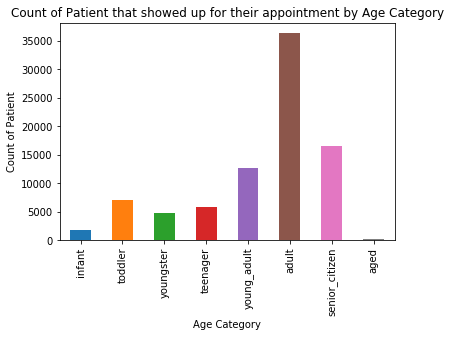

In [81]:
df[ShowedUp].groupby('age_category')['No-show'].count().plot(kind = 'bar');
xlabel('Age Category')
ylabel('Count of Patient')
title("Count of Patient that showed up for their appointment by Age Category");
df[ShowedUp].groupby('age_category')['No-show'].count()

age_category
infant             415
toddler           1748
youngster         1505
teenager          2040
young_adult       4143
adult             8823
senior_citizen    2944
aged                62
Name: No-show, dtype: int64

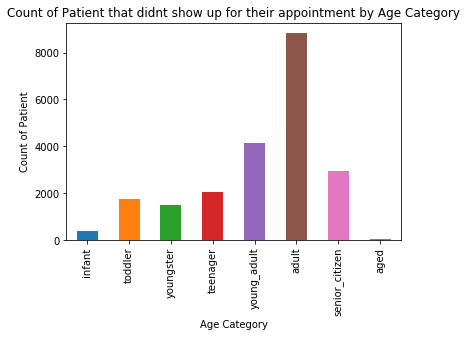

In [82]:
df[NotShowedUp].groupby('age_category')['No-show'].count().plot(kind = 'bar');
xlabel('Age Category')
ylabel('Count of Patient')
title("Count of Patient that didnt show up for their appointment by Age Category");
df[NotShowedUp].groupby('age_category')['No-show'].count()

From the two bar charts above, it seems 'Adult' category which is for ages between 30 and 60 are the highest on both charts. This implies that the age range is the most to show up or not for their appointmennts. 

By this, we do not have enough evidence to infer that age category has a directly correlation with showing up or not

### Does sms received impact show rate?

SMS_received
0    62509
1    25698
Name: No-show, dtype: int64

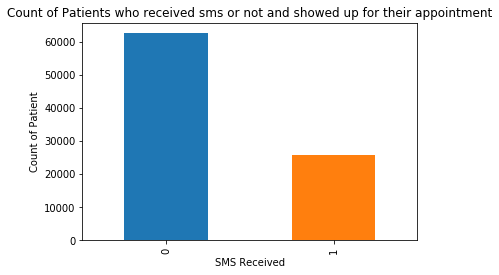

In [83]:
df[ShowedUp].groupby('SMS_received')['No-show'].count().plot(kind = 'bar');
xlabel('SMS Received')
ylabel('Count of Patient')
title("Count of Patients who received sms or not and showed up for their appointment");
df[ShowedUp].groupby('SMS_received')['No-show'].count()

SMS_received
0    12535
1     9784
Name: No-show, dtype: int64

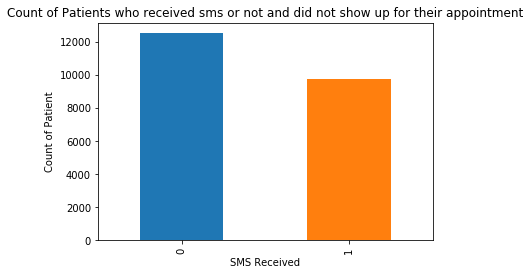

In [84]:
df[NotShowedUp].groupby('SMS_received')['No-show'].count().plot(kind = 'bar');
xlabel('SMS Received')
ylabel('Count of Patient')
title("Count of Patients who received sms or not and did not show up for their appointment");
df[NotShowedUp].groupby('SMS_received')['No-show'].count()

From the 2 bar charts above, it is seen that about two-third of those that received sms showed up for their appointment. This is quite reasonable. The remaining one-third may need to be investigated further to acertain why they didnt show-up despite receiving the sms. 

This shows that, receiving sms seems to be a triggering factor towards showing up for the appointment

### Is there a relationship between the weekday of appointment and possibility of show-up?

day_of_week
Monday       18024
Tuesday      20488
Wednesday    20774
Thursday     13909
Friday       14982
Saturday        30
Sunday           0
Name: No-show, dtype: int64

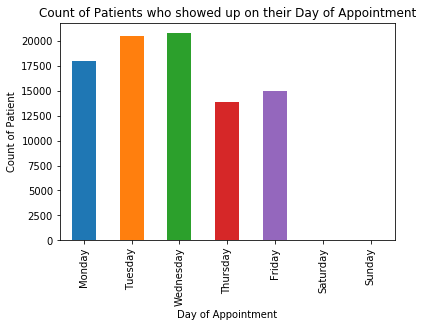

In [91]:
#df.head()
df['day_of_week'] = pd.Categorical(df.day_of_week, ordered = True, categories = ['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])


df[ShowedUp].groupby('day_of_week')['No-show'].count().plot(kind = 'bar');
xlabel('Day of Appointment')
ylabel('Count of Patient')
title("Count of Patients who showed up on their Day of Appointment");
df[ShowedUp].groupby('day_of_week')['No-show'].count()


Tuesday and Wednesday seem to be the days on which most patients show up for their appointments.

day_of_week
Monday       4690
Tuesday      5152
Wednesday    5093
Thursday     3338
Friday       4037
Saturday        9
Sunday          0
Name: No-show, dtype: int64

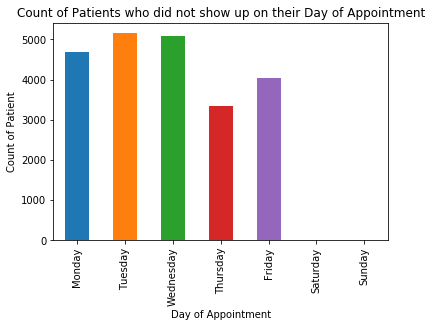

In [90]:
df[NotShowedUp].groupby('day_of_week')['No-show'].count().plot(kind = 'bar');
xlabel('Day of Appointment')
ylabel('Count of Patient')
title("Count of Patients who did not show up on their Day of Appointment");
df[NotShowedUp].groupby('day_of_week')['No-show'].count()

We can not statistically hold that the AppointmentDay could account for show up or not as the days when most patients were present for their appointment were the same days wherein patients did not show up the most (Tuesdays and Wednesdays)

<a id='conclusions'></a>
## Conclusions

> It could be inferred that the lesser the number of waiting days (difference between AppointmentDay and ScheduledDay), the higher the tendency of show-up

> Tuesdays and Wednesdays seemed to be the most consistent days for attendance, although they also seemed to be the days on which most patient didnt show up for their appointment. Further investigation needs to be done to ascretain what accounts for this. 

> Receipt of sms had a bit of impact on show-up rate on appointment days. Although, there were about 1/4th of the patients who received sms but didnt show-up. It could then be necesssary to find out if they actually did receive the sms - promptly or lately - , on their active lines and etc.

> Surveys could be run to understand the rationale behind the selection of days of appointment and their preferences. This would drive further the hypothesis around Tuesdays and Wednesdays seeming like the more preferred days

> Details of assigned medical practitioners who attend to patients upon visit should also be gathered. This could speak to the no show rate for some days as probably some set of medics are the ones usually on duty on those days

> Part of the limitations to confidently substantiate some of the reasons for no-show on appointment days is not having enough information about the patients surveyed. For examsple, knowing the kinds of ailments the patients are nursing and whether its terminal or not would probably affirm some assumptions around their showing up or not. Another detail, as alluded to earlier, could be about the assigned medical practioner





In [92]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0